# Resampling from 16kHz to 8kHz

This notebook demonstrates resampling from 16kHz to 8kHz using the *scipy.signal.resample* method. This isn't theonly or the best method, but it does work.

First we include some of the code that will help load a sample audio file, just like in the other notebook.

In [1]:
from pyhtk.HTKFeat import MFCC_HTK

import numpy as np
%matplotlib inline
import matplotlib.pyplot as P

Here we load the file and display its waveform, spectrorgram and amplitude spectrum.

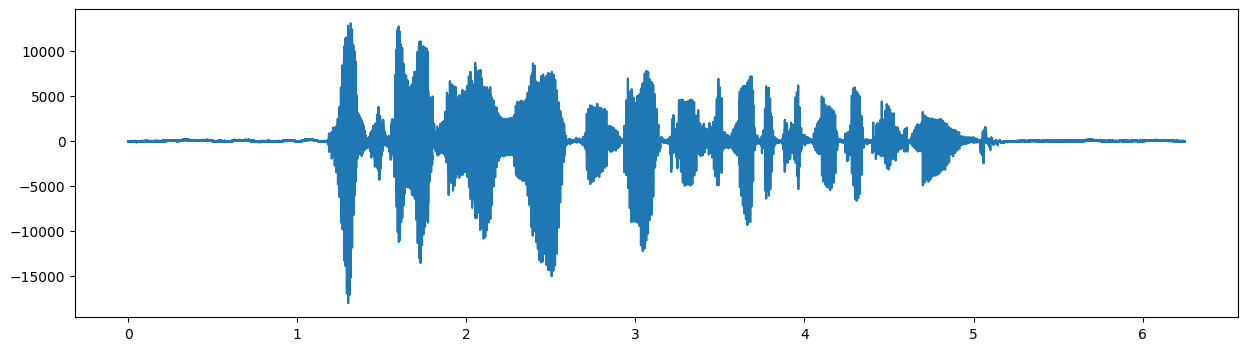

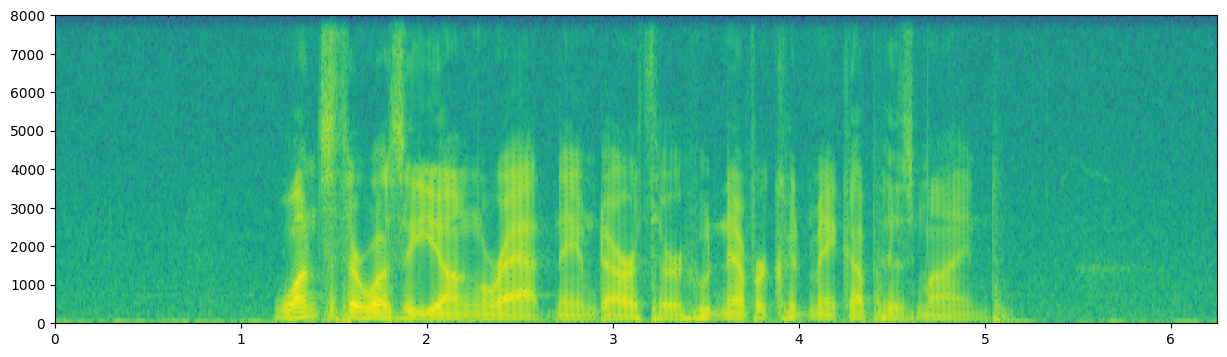

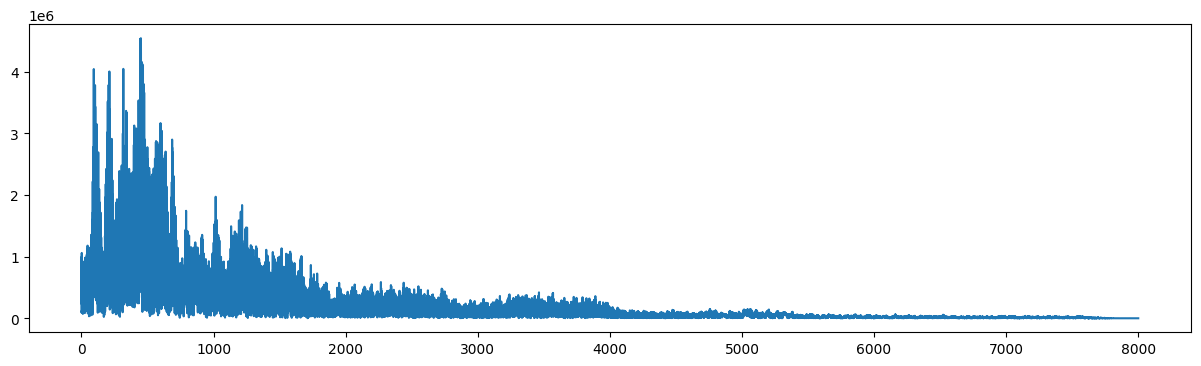

In [4]:
mfcc=MFCC_HTK()

signal = mfcc.load_raw_signal('../tests/file.raw')

def draw_signal(signal, fs):
    sig_len=signal.size/fs #in seconds

    P.figure(figsize=(15,4))
    t=np.linspace(0,sig_len,signal.size)
    P.plot(t,signal)
    P.figure(figsize=(15,4))
    s=P.specgram(signal,Fs=fs)
    P.xlim(0,sig_len)
    P.figure(figsize=(15,4))
    f=np.linspace(0,int(fs/2),int(signal.size/2)+1)
    P.plot(f,np.abs(np.fft.rfft(signal)))
    
draw_signal(signal,16000)

Here we also create an HTML5 audio widget to hear how it actually sounds.

In [5]:
from IPython.display import Audio

Audio(signal,rate=16000)

## Resampling

This is the actuall resampling code. The second argument is simply the number of samples in the destination signal. For 16->8 this is half of the original. For 44.1->8, it's supposed to be *signal.size/5.5125*.

In [8]:
from scipy.signal import resample

signal8k=resample(signal,int(signal.size/2))

Looking at it, there isn't anything too fishy.

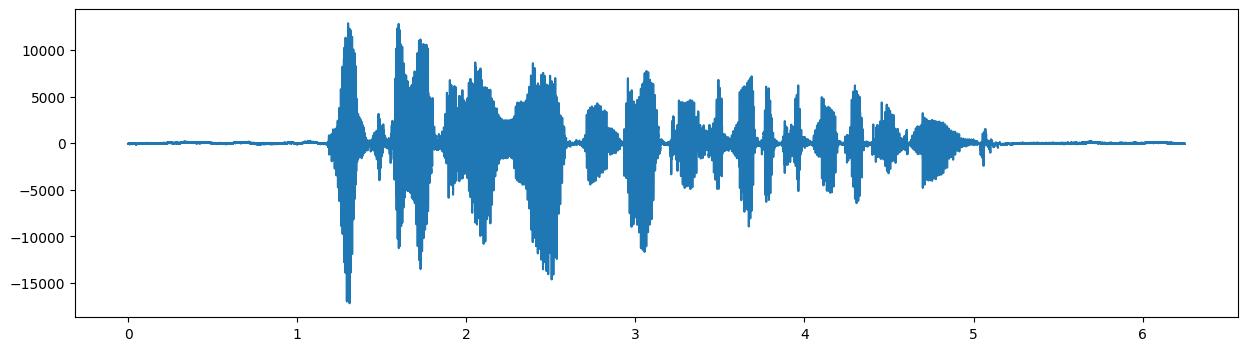

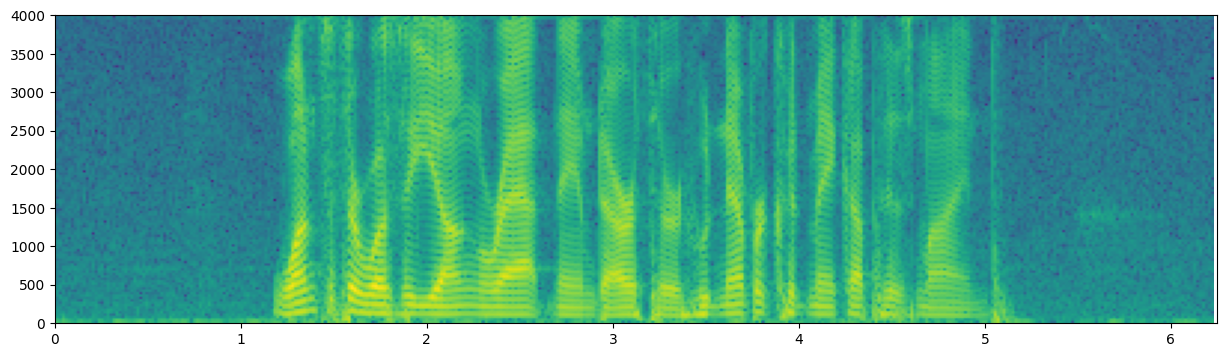

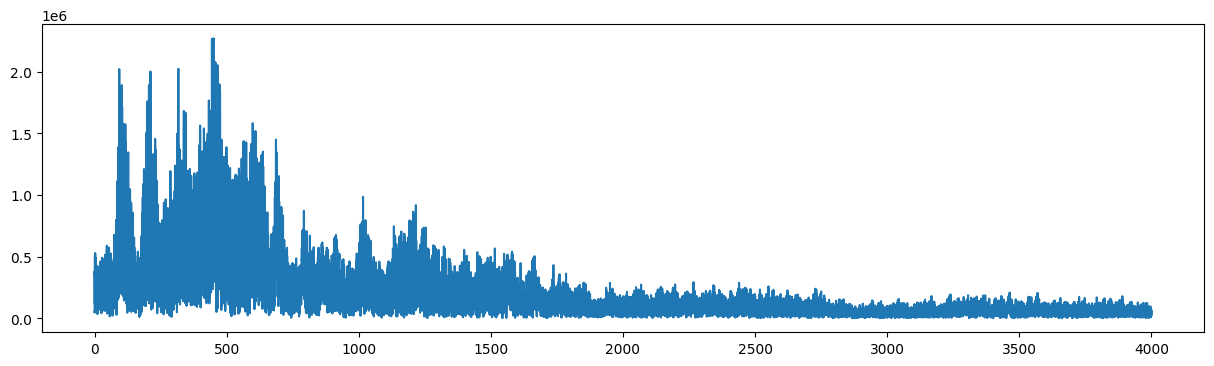

In [9]:
draw_signal(signal8k,8000)

It doesn't sound too bad either.

In [10]:
Audio(signal8k,rate=8000)

The only downside to this method is that it's slow. Read the documentation for more info:
http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample